In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data 
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
analyticsDeneme.csv  productPerformanceReport.csv     weatherHistory.csv
EvFiyatlari	     productPerformanceReportEng.csv  youtube.csv
fifa.csv	     states_all.csv
insurance.csv	     StudentsPerformance.csv


In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [10]:
original_data = pd.read_csv("weatherHistory.csv")
data=original_data.copy()
original_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [0]:
Y=data['Temperature (C)']
X=data[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]

In [13]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Sabit değer (bias): 
 37.926438185285384


In [15]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:37:17   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
Y=data['Temperature (C)'] #Yukarıda X ve Y yi modellemede kullandığımız için tekrar burada dataframe üzerinden değişken olarak eklemek zorunda kaldım
X=data[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]
tahmin = lrm.predict(X)
hatalar = Y - tahmin
print(np.mean(hatalar))

-2.5354426101856083e-15


In [22]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print(bart_stats[0])
print(bart_stats[1])
print(lev_stats[0])
print(lev_stats[1])

2464.844656867369
0.0
2321.2401008573884
0.0


In [24]:
X.corr()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Humidity,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),0.005454,-0.049263,-0.011651,1.000000


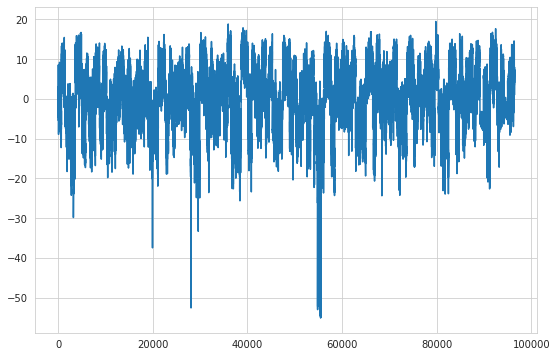

In [26]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

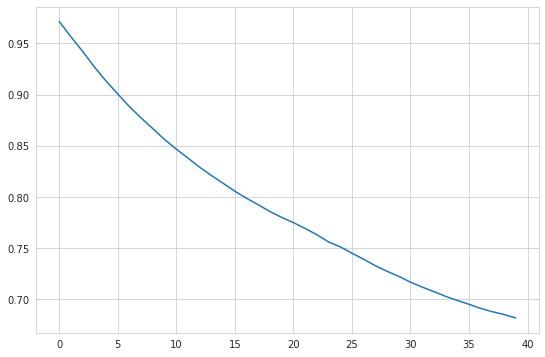

In [25]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

1) Katsayı var dolayısıyla 1 doğru 
2) 0 a çok yakın bir hatalar ortalaması var o yüzden 2 de doğru
3) Sanırım 3 için heteroscesdastisity çıktı o yüzden sıkıntılı tartışalım bu konuyu
4)Doğrusallık yok correlation a baktığımızda
5)hatalar arasındaki otokorelasyon biraz yüksek çıktı 1 den başlıyo 
